## NLP with Amazon Fine Food Reviews Dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

In [1]:
import pandas as pd

In [2]:
#Let's load the data
df = pd.read_csv('reviews.csv')


## Overview of data

In [3]:
# Some example messages
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


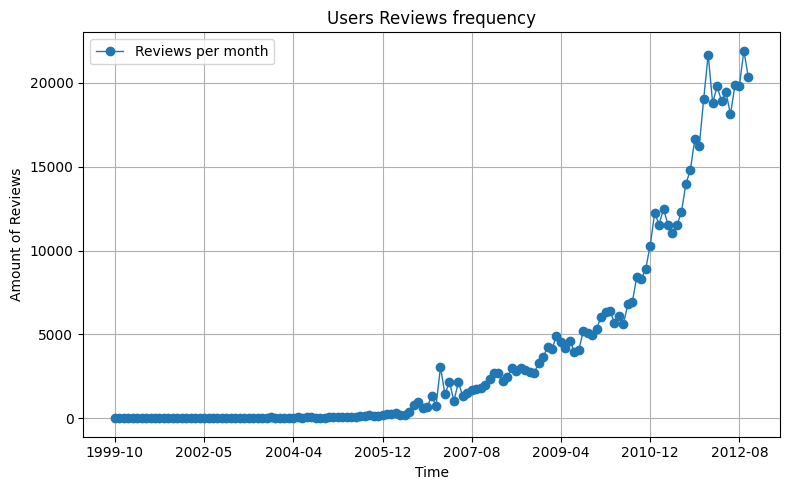

In [4]:
# Plot posting frequency over time
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Time'] = df['Time'].dt.strftime('%Y-%m')
fig, ax = plt.subplots(figsize=(8,5))

# Group the posts per month, then count, and plot the result!
df.groupby(['Time'])['Id'].count().plot(ax=ax, marker='o', lw=1,label='Reviews per month')

# Some style
ax.set_xlabel('Time')
ax.set_ylabel('Amount of Reviews')
ax.set_title("Users Reviews frequency")

ax.grid(True)
fig.tight_layout()

plt.legend()
plt.show()

## Preprocessing the text for NLP

### 1. Remove empty or unwanted messages

In [5]:
def clean_data(df):
    # Remove empty values
    df = df.dropna()
    df = df.drop_duplicates()
    return df.copy()

In [6]:
print(f"Before cleaning: {len(df)} rows")
df = clean_data(df)
print(f"After cleaning: {len(df)} rows")

Before cleaning: 568454 rows
After cleaning: 568401 rows


### 2. Text cleaning: Remove HTML tags, URLs, numbers, etc.

In [7]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove hashtags (but keep the word following the hashtag)
    text = re.sub(r'#', '', text)
    # Remove http tags
    text = re.sub(r'<([^>]*)>','', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove additional white spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Example usage:
sample_text = "I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href=""http://www.amazon.com/gp/product/B001GVISJM"">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>"
text = clean_text(sample_text)
print(text)

I bought these for my husband who is currently overseas He loves these and apparently his staff likes them alsoThere are generous amounts of Twizzlers in each ounce bag and this was well worth the price


### 3. Case normalization

In [8]:
def case_normalization(text):
    return text.lower()

text = case_normalization(text)
print(text)

i bought these for my husband who is currently overseas he loves these and apparently his staff likes them alsothere are generous amounts of twizzlers in each ounce bag and this was well worth the price


### 4. Tokenization: Split into a list of words

In [9]:
def tokenization(text):
    return text.split()

tokens = tokenization(text)
print(tokens)

['i', 'bought', 'these', 'for', 'my', 'husband', 'who', 'is', 'currently', 'overseas', 'he', 'loves', 'these', 'and', 'apparently', 'his', 'staff', 'likes', 'them', 'alsothere', 'are', 'generous', 'amounts', 'of', 'twizzlers', 'in', 'each', 'ounce', 'bag', 'and', 'this', 'was', 'well', 'worth', 'the', 'price']


###  5. Remove stopwords

In [10]:
# Use a predefined list of stopwords

stopwordlist = set(['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now'])
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwordlist]

tokens = remove_stopwords(tokens)
print(tokens)

['bought', 'husband', 'currently', 'overseas', 'loves', 'apparently', 'staff', 'likes', 'alsothere', 'generous', 'amounts', 'twizzlers', 'ounce', 'bag', 'well', 'worth', 'price']


### 6. Lemmatization

In [11]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    # Perform lemmatization
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatized_words = lemmatize(tokens)
print("Lemmatized Tokens:", lemmatized_words)
tokens = lemmatized_words

Lemmatized Tokens: ['bought', 'husband', 'currently', 'overseas', 'love', 'apparently', 'staff', 'like', 'alsothere', 'generous', 'amount', 'twizzlers', 'ounce', 'bag', 'well', 'worth', 'price']


## Apply TF-IDF on Reviews

In [12]:
import math
from collections import Counter

def compute_tf(documents):
 
    tf_documents = []
    for document in documents:
        # Count the frequency of each term in the document
        tf_documents.append(Counter(document))
    return tf_documents

def compute_idf(tf_documents):

    # Count the number of documents that contain each term
    df = Counter()
    for tf in tf_documents:
        for term in tf.keys():
            df[term] += 1
            
    # Compute the IDF for each term
    idf = {}
    total_documents = len(tf_documents)
    for term, count in df.items():
        # Apply the IDF formula
        idf[term] = math.log(total_documents / float(count))
    return idf


def compute_tf_idf_manual(documents):
 
    # First compute the term frequency for each document
    tf_documents = compute_tf(documents)
    # Then compute the inverse document frequency for all terms
    idf = compute_idf(tf_documents)
    
    # Now compute the TF-IDF for each term in each document
    tf_idf_documents = []
    for tf in tf_documents:
        tf_idf = {}
        for term, frequency in tf.items():
            # Multiply term frequency by inverse document frequency
            tf_idf[term] = frequency * idf[term]
        tf_idf_documents.append(tf_idf)
    
    return tf_idf_documents

# Sort the dictionary by value in descending order and select the top N items
def get_highest_values(input_dict, N=1):
    return sorted(input_dict.items(), key=lambda item: item[1], reverse=True)[:N]

    

In [13]:
# Group text by month
grouped = df.groupby('Time')['Text'].apply(' '.join).reset_index()

##------
# Preprocessing goes here: this just splits each document into tokens. Replace it with more cleaning!
# [YOUR PREPROCESSING CODE HERE
grouped['tokens'] = grouped['Text'].apply(clean_text).apply(case_normalization).apply(tokenization).apply(remove_stopwords).apply(lemmatize)
## -------

#Calculate TF-IDF per month
grouped['tfidf'] = compute_tf_idf_manual(grouped['tokens'])

#Get the top-word 
grouped['tfidf_top']  = grouped['tfidf'].apply(get_highest_values)

# Print out year-by-year
grouped['year'] = grouped.Time.str[:4]
for year in grouped.year.unique():
    gy = grouped.loc[grouped['year']==year]
    print(year, [a[0][0] for y,a in  zip(gy['Time'],gy['tfidf_top'])])

1999 ['recite', 'rumplestiskin']
2000 ['clamshell', 'bettlejuice', 'tks', 'gopher', 'welch', 'graced', 'quotbeetlejuicequot']
2001 ['eggwhitesugar', 'coloring', 'cinematography', 'theatersmy', 'widescreen', 'deathrock', 'attic']
2002 ['cadiz', 'elfman', 'storyline', 'poetry', 'undrunk', 'moviemichael', 'deitz', 'recorked', 'winedamaging', 'outtake', 'album', 'cinematic']
2003 ['dialog', 'tastingive', 'puppetmaster', 'shortbrief', 'kittles', 'quotespressoquot', 'quotbeetlejuicequot', 'quotkonaquot', 'tentsuyu']
2004 ['quot', 'equivolent', 'tiptoe', 'gory', 'betelgeuse', 'philipine', 'scissorhands', 'havego', 'tastetells', 'targetwhat', 'coffeefresh', 'detzes']
2005 ['listthese', 'clint', 'caiman', 'maitland', 'barsorganic', 'shortbreadbut', 'jarritos', 'sucralosewhy', 'luden', 'crix', 'stevia', 'foodtablefood']
2006 ['rooibois', 'yearservice', 'tea', 'andie', 'tea', 'chocolate', 'eatpart', 'oreo', 'tea', 'tea', 'tea', 'mg']
2007 ['tea', 'tea', 'tea', 'tea', 'taste', 'tea', 'taste', 'tea

# Sentiment analysis with VADER

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#Define a function to perform sentiment analysis using VADER
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    return compound_score


In [15]:
# Now get the most positive and most negative messages
df = pd.read_csv('reviews.csv')

# Apply the function to the 'tokens' column of the DataFrame
df['sentiment'] = df['Text'].apply(get_sentiment)


print("Most Negative")
print(list(df.sort_values(['sentiment'],ascending=True)['Text'][:3]))

print('\n Most positive')
print(list(df.sort_values(['sentiment'],ascending=False)['Text'][:3]))


Most Negative
['Green Tea Ingredient Slows Breast Cancer-Antioxidant in Green Tea May Stop Breast Cancer Growth<br /><br /><a href="http://www.amazon.com/gp/product/B000WB1YSE">Kirkland Signature Green Tea Matcha Blend, 100% Japanese Tea Leaves, 100 Tea Bags by A2AWorld Green Tea</a><br /><br />By Jennifer Warner<br />WebMD Health News<br />Reviewed by Louise Chang, MD<br />April 7, 2008 -- An antioxidant in green tea may be a powerful weapon against breast cancer.<br />A new study shows the green tea antioxidant EGCG (epigallocatechin-3-gallate) significantly slowed breast cancer growth in female mice.<br />Cancer Videos<br /><br />Video: Cancer and Exercise<br /><br />Video: Making Chemotherapy Safer<br /><br />Video: Foods After Cancer<br />All Cancer-Related Videos<br />Related Slideshows<br />* Dangers of Sun-Damaged Skin<br />* Common Adult Skin Problems<br />Related to<br />lymphoma, leukemia, chemotherapy, radiation, mammogram, PSA test , colonoscopy, herceptin, tamoxifen, brea

# Topic Modeling with LDA

In [16]:
import pandas as pd
from gensim import corpora, models
import gensim

# Apply all preprocessing functions
df['tokens'] = df['Text'].apply(clean_text).apply(case_normalization).apply(tokenization).apply(remove_stopwords).apply(lemmatize)

# Create a dictionary and corpus needed for Topic Modeling
dictionary = corpora.Dictionary(df['tokens']) 
corpus = [dictionary.doc2bow(text) for text in df['tokens']] 

# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
    
for topic_num, topic in topics:
    # Parse the topic output to show only words
    print("Topic #{}:".format(topic_num + 1) + " " + "".join([word.split("*")[1].replace('"', '') for word in topic.split("+")]))
    

(0, '0.037*"oil" + 0.037*"protein" + 0.034*"sauce" + 0.023*"coconut" + 0.021*"chicken" + 0.017*"meal" + 0.016*"powder" + 0.015*"heat" + 0.014*"rice" + 0.014*"cook"')
(1, '0.080*"salt" + 0.067*"far" + 0.060*"worth" + 0.059*"received" + 0.040*"absolutely" + 0.035*"went" + 0.023*"vitamin" + 0.020*"puppy" + 0.019*"chili" + 0.019*"sodium"')
(2, '0.093*"coffee" + 0.070*"tea" + 0.035*"drink" + 0.024*"water" + 0.021*"bean" + 0.020*"strong" + 0.015*"green" + 0.014*"blend" + 0.013*"morning" + 0.012*"dark"')
(3, '0.028*"one" + 0.020*"get" + 0.019*"would" + 0.015*"time" + 0.014*"dont" + 0.014*"like" + 0.013*"much" + 0.013*"use" + 0.011*"try" + 0.011*"im"')
(4, '0.050*"taste" + 0.048*"good" + 0.040*"great" + 0.040*"flavor" + 0.040*"like" + 0.038*"love" + 0.016*"make" + 0.014*"cooky" + 0.013*"best" + 0.013*"really"')
(5, '0.046*"day" + 0.038*"year" + 0.024*"month" + 0.022*"last" + 0.022*"long" + 0.021*"happy" + 0.019*"another" + 0.018*"ball" + 0.017*"problem" + 0.017*"week"')
(6, '0.082*"chocolate" 